In [156]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np

# Librerías para preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Modelos de machine learning
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Métricas y evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Librerías para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
# Cargar el dataset (puede ser CSV o Excel)
df = pd.read_csv('/Users/admin/Downloads/MLOps/Proyecto/BookHotelModel/data_engineering/data/raw/hotel_bookings.csv', parse_dates=['reservation_status_date'])

# Ver las primeras filas del dataset
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [158]:
# Verificar si existen valores faltantes
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [159]:
df[['agent','company']] = df[['agent','company']].fillna(0)
df.isnull().sum().sort_values(ascending=False)

country                           488
children                            4
hotel                               0
agent                               0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
company                             0
previous_cancellations              0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
previous_bookings_not_canceled      0
is_repeated_guest                   0
is_canceled                         0
distribution_channel                0
market_segment                      0
meal                                0
babies                              0
adults                              0
stays_in_week_nights                0
stays_in_weekend_nights             0
arrival_date

In [160]:
df['country'] = df['country'].fillna(df.country.mode()[0])
df['children'] = df['children'].fillna(df.children.mode()[0])
df.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [161]:
df_transformado = df.astype({
    'hotel': 'category',
    'is_canceled': 'int64',
    'lead_time': 'int64',
    'arrival_date_year': 'category',
    'arrival_date_month': 'category',
    'arrival_date_week_number': 'int64',
    'arrival_date_day_of_month': 'int64',
    'stays_in_weekend_nights': 'int64',
    'stays_in_week_nights': 'int64',
    'adults': 'int64',
    'children': 'int64',
    'babies': 'int64',
    'meal': 'category',
    'country': 'category',
    'market_segment': 'category',
    'distribution_channel': 'category',
    'is_repeated_guest': 'category',
    'previous_cancellations': 'int64',
    'previous_bookings_not_canceled': 'int64',
    'reserved_room_type': 'category',
    'assigned_room_type': 'category',
    'booking_changes': 'int64',
    'deposit_type': 'category',
    'agent': 'category',
    'company': 'category',
    'days_in_waiting_list': 'int64',
    'customer_type': 'category',
    'adr': 'float',
    'required_car_parking_spaces': 'int64',
    'total_of_special_requests': 'int64',
    'reservation_status': 'category',
    'reservation_status_date': 'datetime64[ns]'
})
df_transformado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  category      
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  category      
 4   arrival_date_month              119390 non-null  category      
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  int64  

In [162]:
df = df_transformado

In [163]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extraer características de fecha (año, mes, día)
df['reservation_year'] = df['reservation_status_date'].dt.year
df['reservation_month'] = df['reservation_status_date'].dt.month
df['reservation_day'] = df['reservation_status_date'].dt.day

# Ahora podemos eliminar la columna de fecha original si ya no es necesaria
df.drop('reservation_status_date', axis=1, inplace=True)

In [164]:
# Identificar las columnas categóricas que deben ser codificadas
categorical_cols = ['hotel', 'arrival_date_year', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'market_segment', 
                    'customer_type', 'reserved_room_type', 'assigned_room_type','deposit_type','agent','company','reservation_status']

# Aplicar OneHotEncoding a las columnas categóricas usando get_dummies()
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Verificar que no hay variables categóricas sin codificar
print(df_encoded.dtypes)




is_canceled                     int64
lead_time                       int64
arrival_date_week_number        int64
arrival_date_day_of_month       int64
stays_in_weekend_nights         int64
                                ...  
company_539.0                    bool
company_541.0                    bool
company_543.0                    bool
reservation_status_Check-Out     bool
reservation_status_No-Show       bool
Length: 944, dtype: object


In [165]:
# Identificar columnas numéricas
numerical_cols = ['arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights',
                  'adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes',
                  'days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests']

# Escalar las variables numéricas
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [166]:
# Definir X (variables independientes) e y (variable dependiente)
X = df_encoded.drop('is_canceled', axis=1)
y = df_encoded['is_canceled']

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
# Entrenar el modelo RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir con el modelo RandomForest
y_pred_rf = rf_model.predict(X_test)


In [168]:
# Evaluación del modelo RandomForest
print('Random Forest Model:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision: {precision_score(y_test, y_pred_rf)}')
print(f'Recall: {recall_score(y_test, y_pred_rf)}')
print(f'F1 Score: {f1_score(y_test, y_pred_rf)}')
print(f'ROC AUC Score: {roc_auc_score(y_test, y_pred_rf)}')

Random Forest Model:
Accuracy: 0.9997068431191892
Precision: 1.0
Recall: 0.9992197079478319
F1 Score: 0.9996097017005855
ROC AUC Score: 0.999609853973916


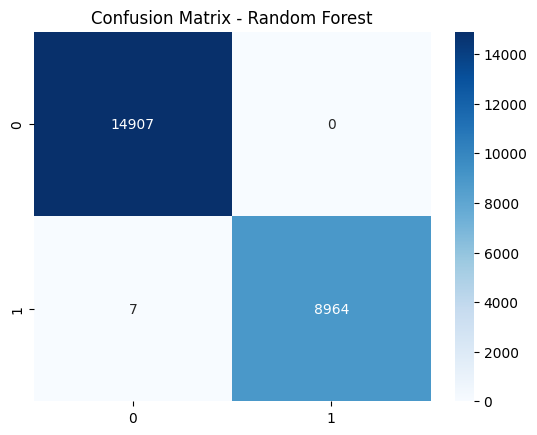

In [169]:
# Matriz de confusión para el modelo RandomForest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [170]:
# Verifica que el DataFrame sea correcto
print(df.head())
print(df.columns)
print(type(df))

# Verifica si alguna columna está mal nombrada o faltante
for col in df.columns:
    print(col, df[col].dtype)

          hotel  is_canceled  lead_time arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342              2015               July   
1  Resort Hotel            0        737              2015               July   
2  Resort Hotel            0          7              2015               July   
3  Resort Hotel            0         13              2015               July   
4  Resort Hotel            0         14              2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  company  \
0                        0                     0       2  ...      0.0   
1                     

In [191]:
print(df['is_repeated_guest'].dtype) 

category
